# Лабораторная работа 4. Модель однофазной  многоканальной замкнутой системы обслуживания

## Задание 1.

Вычислительный центр фирмы состоит из $m$ главных серверов коллективного пользования. Число работающих в центре программистов в любой момент времени равно $k$. Каждый программист готовит свою программу и через терминал передает ее на сервер для выполнения, куда она сразу попадает. Время подготовки программ имеет экспоненциальное распределение со средним значением $t_{1}$ мин. Время выполнения программы на любом из серверов имеет экспоненциальное распределение со средним значением $t_{2}$ мин. Каждый программист ожидает ответа от сервера, прежде, чем начнет писать следующую программу.

Найти (теоретически и экспериментально):
 - вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
 - среднее время до получения пользователем результатов реализации;
 - среднее количество программ, ожидающих выполнения на сервере.
 
 Требуется выполнить расчет при заданном по варианту значении $m$, а также при $m=1$.

In [348]:
Variant<-8
set.seed(Variant) 
k<-sample(c(10:25),1)
m<-sample(c(3:6),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,m,t1,t2))

k,m,t1,t2
<int>,<int>,<int>,<int>
25,6,20,3


Теоретическая часть:

Вычислительный центр представляет собой СМО вида $M/M/m/\infty$, для которой процесс гибели-размножения представим в следующем виде:

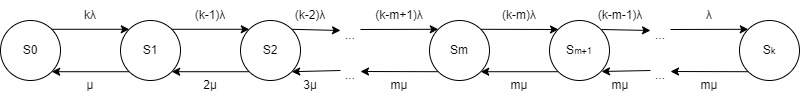

Число состояний этой системы огранично, поскольку каждый программист дожидается ответа от сервера, то есть, система — замкнутая.

Интенсивность потока подготовки программ одним специалистом:
$$\lambda=\frac{1}{t_1}$$
Интенсивность потока подготовки программ $d$ специалистами:
$$\lambda_d=\frac{d}{t_1}$$
Интенсивность потока выполнения программы одним сервером:
$$\mu=\frac{1}{t_2}$$
Интенсивность потока выполнения программ $e$ серверами:
$$\mu_e=\frac{e}{t_2}$$
Нагрузка системы:
$$\rho = \frac{\lambda}{\mu} $$

Определим искомые характеристики данной системы:

- Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал:
$$ P' = 1 - \sum_{i=0}^{m} P_i $$

> Стоит отметить, что в задании имеется ввиду то, что программа ***уже*** поступила на терминал. Иначе, если программа ещё не поступила на терминал, и нам необходимо найти вероятность того, что она не будет выполнена сразу же, то есть, встанет в очередь, то суммирование будет производиться от $i = 0$ до $i = m - 1$, поскольку, если система до поступления программы на терминал находится в состоянии $S_m$, то есть, если все сервера заняты обработкой программ, то при поступлении новой программы система перейдет в состояние $S_{m+1}$, а это означает, что программа встанет в очередь.

$$P_i=\frac{\prod_{j=1}^i \lambda_j}{\prod_{j=1}^i \mu_j}\cdot P_0 = \prod_{j=1}^i\rho_j \cdot P_0$$

Найдем $P_0$:

$$P_0=\left(1+\sum_{i=1}^{k}\frac{\prod_{j=1}^i\lambda_j}{\prod_{j=1}^i \mu_j}\right)^{-1}$$

$$P_0=\left(1+\sum_{i=1}^{m}\frac{\prod_{j=1}^i\lambda_j}{\prod_{j=1}^i \mu_j} + \sum_{i=m+1}^{k}\frac{\prod_{j=1}^i\lambda_j}{\prod_{j=1}^i \mu_j} \right)^{-1} $$

$$P_0=\left(1+\sum_{i=1}^{m}\prod_{j=1}^i\frac{\lambda_j}{\mu_j} + \sum_{i=m+1}^{k}\prod_{j=1}^i\frac{\lambda_j}{\mu_j} \right)^{-1} $$

$$P_0=\left(1+\sum_{i=1}^{m}\prod_{j=1}^i \rho_i + \sum_{i=m+1}^{k}\prod_{j=1}^i \rho_i \right)^{-1} $$

$$ \rho_j = \frac{\lambda_j }{\mu_j} = \frac{(k-j+1) \cdot \lambda}{j \cdot \mu} = \frac{k-j+1}{j} \cdot \rho, j\in[1,m] $$

$$ \rho_j = \frac{\lambda_j }{\mu_j} = \frac{(k-j+1) \cdot \lambda}{m \cdot \mu} = \frac{k-j+1}{m} \cdot \rho, j\in[m+1,m+k] $$

$$ \prod_{j=1}^i\rho_j = \prod_{j=1}^i \frac{k-j+1}{j} \cdot \rho = \frac{k!}{(k-i)!} \cdot \frac{\rho^i}{i!}, i\in[1,m] $$

$$ \prod_{j=1}^i\rho_j = \prod_{j=1}^m \frac{k-j+1}{j} \cdot \rho \cdot \prod_{j=m+1}^{i} \frac{k-j+1}{m} \cdot \rho, i\in[m+1,k] $$

$$ \prod_{j=1}^i\rho_j = \prod_{j=1}^k (k-j+1) \cdot  \prod_{j=1}^m \frac{\rho}{j} \cdot \prod_{j=m+1}^{i} \frac{\rho}{m}, i\in[m+1,k] $$

$$ \prod_{j=1}^i\rho_j = \frac{k!}{(k-i)!} \cdot \frac{\rho^m}{m!} \cdot \frac{\rho^{i-m}}{ m^{i-m}} , i\in[m+1,k] $$

Тогда

$$P_0=\left(1+\sum_{i=1}^{m}\frac{k!}{(k-i)!} \cdot \frac{\rho^i}{i!} +  \frac{1}{m!} \sum_{i=m+1}^{k}\frac{k!}{(k-i)!} \cdot \frac{\rho^{i}}{ m^{i-m}} \right)^{-1} $$

Тогда

$$ P' = 1 - P_0 \cdot \sum_{i=0}^{m} \frac{k!}{(k-i)!} \cdot \frac{\rho^i}{i!} $$


- Среднее время до получения пользователем результатов реализации:

$$T_{сист} = W_{оч} + \frac{1}{\mu} $$

$$ W_{оч} = \frac{L_{сист}}{Λ} - \frac{1}{\mu} $$

$$L_{сист}=\sum_{i=1}^{k}P_i\cdot i $$

$$ \Lambda = (k - L_{сист}) \cdot \lambda $$

- Среднее количество программ, ожидающих выполнения на сервере:

$$L_{оч} = L_{сист} - \frac{\Lambda}{\mu} $$


Теоретическая часть, реализованная в среде R:

In [349]:
lambda <- 1/t1
mu <- 1/t2
rho <- lambda/mu
lambda
mu
rho

[1] 0.05

[1] 0.3333333

[1] 0.15

In [350]:
# функция суммирования
summ <- function(from, to, expr) {
  res <- 0
  for (i in (from:to)) {
    res <- res + expr(i)
  }
  return(res)
}

# Произведение ро от 1 до i.
prod_rho_j <- function(i) {
  if (i <= m) {
    return(
      (factorial(k) / factorial(k-i)) * (rho ^ i / factorial(i))
    )
  } else {
    return(
      (factorial(k) / factorial(k-i)) * (rho ^ m / factorial(m)) * ((rho ^ (i - m)) / m ^ (i - m))
    )
  }
}

In [351]:
P0 <- (
  1 + 
  summ(1, m, function(i){ return((factorial(k)/factorial(k-i)) * (rho^i / factorial(i))) }) + 
  1/factorial(m) * summ(m+1, k, function(i){ return((factorial(k)/factorial(k-i)) * (rho^i / m ^ (i - m))) })
)^-1
P0

[1] 0.02993485

In [352]:
# Проверим, что сумма всех вероятностей = 1.
Probs <- c(1:k)
for (i in(1:k)) {
  Probs[i] <- prod_rho_j(i) * P0
}
Probs
sum(Probs) + P0 # == 1
P0 * summ(0, k, prod_rho_j) # == 1

[1] 1.122557e-01 2.020602e-01 2.323693e-01 1.917047e-01 1.207739e-01
 [6] 6.038697e-02 2.868381e-02 1.290771e-02 5.485779e-03 2.194311e-03
[11] 8.228668e-04 2.880034e-04 9.360110e-05 2.808033e-05 7.722091e-06
[16] 1.930523e-06 4.343676e-07 8.687352e-08 1.520287e-08 2.280430e-09
[21] 2.850537e-10 2.850537e-11 2.137903e-12 1.068952e-13 2.672379e-15

[1] 1

[1] 1

In [353]:
# Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
nPinstant = 1 - P0 * summ(0, m, prod_rho_j)

Lsyst = summ(1, k, function(i) {return(Probs[i] * i)})
LAMBDA = (k - Lsyst) * lambda
Woch = Lsyst / LAMBDA - 1 / mu

# Среднее время до получения пользователем результатов реализации;
Tsyst = Woch + 1 / mu

# Среднее количество программ, ожидающих выполнения на сервере.
Loch = lambda * Woch
Loch = Lsyst - LAMBDA / mu

nPinstant
Tsyst
Loch

[1] 0.05051436

[1] 3.079903

[1] 0.08655088

Экспериментальная часть, реализованная в среде R:

In [399]:
test <- function(k, m, t1, t2, N, dt) {
  lambda <- 1/t1
  mu <- 1/t2
  
  curTime <- 0                    # Текущее время симуляции
  progSendAt <- rexp(k, lambda)   # времена, в которые программисты отправляют свои программы
  progReceiveAt <- integer(k)     # времена, в которые программисты получают ответ от сервера
  progWaits <- integer(k)         # флаг ожидания программистом ответа от сервера
  qProgs <- c()                   # очередь к серверам
  qProgsLenTotal <- 0             # суммарная длина очереди к серверам
  busyServers <- c()              # сервера, занятые обработкой программ
  nPinstant <- 0                  # вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал
  numOfReqs <- 0                  # число поступивших запросов
  waitingDurationTotal <- 0       # суммарная длительность обработки запросов (очередь + сервер)

for (i in 1:N) {
  curTime <- curTime + dt
  for (j in 1:k) {
    if (progWaits[j] == 1) {
      if (progReceiveAt[j] != 0 && curTime >= progReceiveAt[j]) {
        waitingDuration <- progReceiveAt[j] - progSendAt[j]
        waitingDurationTotal <- waitingDurationTotal + waitingDuration
        progSendAt[j] <- curTime + rexp(1, lambda)
        progReceiveAt[j] <- 0
        progWaits[j] <- 0
      }
    } else if (curTime >= progSendAt[j]) {
      numOfReqs <- numOfReqs + 1
      progWaits[j] <- 1

      handleDuration <- rexp(1, mu)
      if (length(busyServers) < m) {
        busyServers <- append(busyServers, handleDuration)
        progReceiveAt[j] <- curTime + handleDuration
      } else {
        nPinstant <- nPinstant + 1
        qProgs <- append(qProgs, j)
      }
    }
  }
  
  j <- 1
  ssLen <- length(busyServers)
  while (j <= ssLen) {
    busyServers[j] <- busyServers[j] - dt
    if (busyServers[j] <= 0) {
      busyServers <- busyServers[-j]
      ssLen <- ssLen - 1
    } else {
      j <- j + 1
    }
  }

  if (length(busyServers) < m && length(qProgs) > 0) {
    jMax <- min(c(length(qProgs), m - length(busyServers)))
    for (j in (1:jMax)) {
      qHead <- qProgs[1]
      handleDuration <- rexp(1, mu)
      busyServers <- append(busyServers, handleDuration)
      progReceiveAt[qHead] <- curTime + handleDuration
      qProgs <- qProgs[-1]
    }
  }

  qProgsLenTotal <- qProgsLenTotal + length(qProgs)
}

  # Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
  res1 <- nPinstant / numOfReqs

  # Среднее время до получения пользователем результатов реализации;
  res2 <- waitingDurationTotal / numOfReqs

  # Среднее количество программ, ожидающих выполнения на сервере.
  res3 <- qProgsLenTotal / N

  return(c(res1, res2, res3))
}

In [401]:
N <- 100000   # Число тиков (прибавления дельт времени)
dt <- 0.01      # Тик (Дельта времени)
res <- test(k, m, t1, t2, N, dt)
res[1]
res[2]
res[3]

[1] 0.08968177

[1] 3.115812

[1] 0.08731

Выполним расчеты при $m = 1$:

Теоретические рассчеты в среде R:

In [372]:
m <- 1
P0 <- (
  1 + 
  summ(1, m, function(i){ return((factorial(k)/factorial(k-i)) * (rho^i / factorial(i))) }) + 
  1/factorial(m) * summ(m+1, k, function(i){ return((factorial(k)/factorial(k-i)) * (rho^i / m ^ (i - m))) })
)^-1
P0

[1] 3.249199e-08

In [373]:
# Проверим, что сумма всех вероятностей = 1.
Probs <- c(1:k)
for (i in(1:k)) {
  Probs[i] <- prod_rho_j(i) * P0
}
Probs
sum(Probs) + P0 # == 1
P0 * summ(0, k, prod_rho_j) # == 1

[1] 1.218450e-07 4.386419e-07 1.513314e-06 4.993938e-06 1.573090e-05
 [6] 4.719271e-05 1.344992e-04 3.631479e-04 9.260272e-04 2.222465e-03
[11] 5.000547e-03 1.050115e-02 2.047724e-02 3.685903e-02 6.081740e-02
[16] 9.122610e-02 1.231552e-01 1.477863e-01 1.551756e-01 1.396580e-01
[21] 1.047435e-01 6.284611e-02 2.828075e-02 8.484225e-03 1.272634e-03

[1] 1

[1] 1

In [374]:
# Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
nPinstant = 1 - P0 * summ(0, m, prod_rho_j)

Lsyst = summ(1, k, function(i) {return(Probs[i] * i)})
LAMBDA = (k - Lsyst) * lambda
Woch = Lsyst / LAMBDA - 1 / mu

# Среднее время до получения пользователем результатов реализации;
Tsyst = Woch + 1 / mu

# Среднее количество программ, ожидающих выполнения на сервере.
Loch = lambda * Woch
Loch = Lsyst - LAMBDA / mu

nPinstant
Tsyst
Loch

[1] 0.9999998

[1] 55

[1] 17.33333

Экспериментальные расчеты в среде R:

In [383]:
N <- 1000000     # Число тиков (прибавления дельт времени)
dt <- 0.1      # Тик (Дельта времени)
res <- test(k, 1, t1, t2, N, dt)
res[1]
res[2]
res[3]

[1] 0.9999694

[1] 56.51332

[1] 17.46631